In [36]:
import psycopg2, pandas as pd

In [37]:
def query_database(connection, sql, *args, **kwargs):
    if connection.get_transaction_status() == 3:
        connection.reset()
    with connection.cursor() as cursor:
        cursor.execute(sql, *args, **kwargs)
        rows = cursor.fetchall()
        columns = [d[0] for d in cursor.description]
    df = pd.DataFrame(rows, columns=columns)
    return df

In [38]:
connection = psycopg2.connect('postgres://fga@localhost/fga_datawarehouse')

new users

* APP_STARTUP
* action = loaded, param = SIGNUP PAGE
* register as gues
* open_tutorialpage
* tutorial_dismiss
* (homepage_loaded)
* initialize_quiz (not found, perhaps you meant start_quiz?)
* finalize quiz submit


in first 10 minutes

### events

In [39]:
sql = '''
select 
    action,
    count(1)
    
from events

group by 1

order by 2 desc

'''

df = query_database(connection, sql)
df

,action,count
0,LOADED,777474
1,APP_PAUSED,227190
2,CONSTRUCTOR,224722
3,START_QUIZ,147902
4,APP_STARTUP,146158
5,APP_COMPONENT_StartApp,145838
6,APP_RESUMED,135068
7,COMPETITION_CLICK,118968
8,HeyzapAds_STARTED,63311
9,registerHeyzapAds_IncentivizedAd_fetch,62362


In [40]:
df[df['action'].str.contains('quiz', case=False)]

,action,count
3,START_QUIZ,147902
11,SUMMARY_QUIZ,36680
22,FINALIZE_QUIZ_SUBMIT,20


In [41]:
sql = ''' select * from events limit 1 '''
df = query_database(connection, sql)
df.head()

,id,version,createdAt,updatedAt,deleted,info,warn,error,previosPage,currentPage,action,subAction,params,currentUser,currentUserProfile,userDevice,userCountry
0,00000ef7-44bf-44e9-bb16-e452a683d872,\x0000000000cd7cc1,2019-10-17 22:34:12.3162084 +00:00,2019-10-17 22:34:12.3162084 +00:00,False,True,False,False,OFFERS,OFFERS,APP_PAUSED,,0.0,35e9ef31-386d-4701-988d-c228f25df219,02674699-E2E3-4933-AB6E-CE33573FE39A,A8D3D978-2387-4EB6-B995-846FD2DC473A,us


In [49]:
sql = '''select * from events limit 1'''
df = query_database(connection, sql)
df.head()

,id,version,createdAt,updatedAt,deleted,info,warn,error,previosPage,currentPage,action,subAction,params,currentUser,currentUserProfile,userDevice,userCountry
0,00000ef7-44bf-44e9-bb16-e452a683d872,\x0000000000cd7cc1,2019-10-17 22:34:12.3162084 +00:00,2019-10-17 22:34:12.3162084 +00:00,False,True,False,False,OFFERS,OFFERS,APP_PAUSED,,0.0,35e9ef31-386d-4701-988d-c228f25df219,02674699-E2E3-4933-AB6E-CE33573FE39A,A8D3D978-2387-4EB6-B995-846FD2DC473A,us


In [68]:
sql = '''
with events as (
    select 
        events.id as event_id,
        action,
        events."currentUser" as user_id,
        events."userDevice" as device_id,
        events."createdAt" as ts,
        devices."DeviceOS" as client

    from events join devices 
        on events."currentUser" = devices."UserID"
        and events."userDevice" = devices."Id"
)

select * from events limit 10
'''

df = query_database(connection, sql)
df.head()

,event_id,action,user_id,device_id,ts,client
0,00000ef7-44bf-44e9-bb16-e452a683d872,APP_PAUSED,35e9ef31-386d-4701-988d-c228f25df219,A8D3D978-2387-4EB6-B995-846FD2DC473A,2019-10-17 22:34:12.3162084 +00:00,Android
1,00001cdc-86d5-4b90-acf7-ded967d0dc1e,APP_COMPONENT_StartApp,db3e5d8e-8013-4d8a-910c-5255645dec90,776E6977-080F-4B19-BBF9-53DF5D599620,2019-11-24 01:54:29.5198471 +00:00,iOS
2,000022d9-2f4e-49be-813e-6f1ad2540b68,LOADED,e4e6681f-b80d-40a9-b7d4-219fd6cbc7cc,A5BDCF9F-AF87-4F18-BCB3-D1608A8BDB12,2019-11-10 23:48:48.6651948 +00:00,Android
3,00002bd7-7ae3-4a11-b49b-2acaa7815c69,COMPETITION_CLICK,fc588da2-39c3-439e-8914-d91b812674f7,A6F9EA2D-F341-4698-818E-4CC0ADF90A62,2019-11-10 20:06:11.4216982 +00:00,Android
4,00002cc2-7b83-43f3-9222-1a6cb25e3a95,APP_PAUSED,d83fe34b-6b96-4790-b10d-33536e7f6584,88F2C9BE-BA8C-48E2-97CF-807A3E3622D0,2019-11-06 14:24:05.8718009 +00:00,Android


In [75]:
sql = '''
with events as (
    select 
        events.id as event_id,
        action,
        events."currentUser" as user_id,
        events."userDevice" as device_id,
        events."createdAt"::timestamp as ts,
        devices."DeviceOS" as client

    from events join devices 
        on events."currentUser" = devices."UserID"
        and events."userDevice" = devices."Id"
    
    where action in (
      'APP_STARTUP', 
      'LOADED', 
      'REGISTER_AS_GUEST', 
      'OPEN_TutorialPage', 
      'TUTORIAL_DISMISS', 
      'START_QUIZ', 
      'FINALIZE_QUIZ_SUBMIT'
    )

), session_starts as (
    select
        event_id,
        user_id,
        device_id,
        client,
        ts
        
    from events
    
    where action = 'APP_STARTUP'
    
), session_starts_new_users as (
    select
        event_id,
        user_id,
        device_id,
        client,
        ts
        
    from session_starts join users on user_id = users."Id"
        and users."CreatedAt"::date = ts::date

), session_starts_ordered as (
    select
        event_id,
        user_id,
        device_id,
        client,
        ts,
        row_number() over (partition by user_id order by ts)
        
    from session_starts_new_users
        
), session_starts_first_ever as (
    select
        event_id,
        user_id,
        device_id,
        client,
        ts
        
    from session_starts_ordered
    
    where row_number = 1

), session_events as (
    select
        session_starts_first_ever.event_id as start_event,
        session_starts_first_ever.ts as start_ts,
        user_id,
        device_id,
        client,
        events.event_id,
        events.ts,
        action
        
    from events join session_starts_first_ever
        using (user_id, device_id, client)

    where events.ts >= session_starts_first_ever.ts
        and events.ts < session_starts_first_ever.ts + interval '10 minutes'

), session_events_seen as (
    select
        start_event,
        start_ts,
        user_id,
        device_id,
        client,
        action,
        count(1)
        
    from session_events
    
    group by 1, 2, 3, 4, 5, 6

), session_events_seen_by_date as (
    select
        start_ts::date as date,
        client,
        action,
        count(1)
        
    from session_events_seen
    
    group by 1, 2, 3
    
    order by 1, 3 desc

), sessions_by_date as (
    select
        ts::date as date,
        client,
        count(1)
        
    from session_starts_first_ever
    
    group by 1, 2
    
    order by 1

), activation_funnel as (
    select
        date,
        client,
        action,
        session_events_seen_by_date.count as count,
        sessions_by_date.count as n_new_users,
        session_events_seen_by_date.count::float / sessions_by_date.count as percent
        
    from session_events_seen_by_date join sessions_by_date
        using (date, client)
        
)

select * from activation_funnel

'''

df = query_database(connection, sql)
df.head()

,date,client,action,count,n_new_users,percent
0,2019-10-14,Android,START_QUIZ,10,17,0.588235
1,2019-10-14,iOS,START_QUIZ,9,18,0.500000
2,2019-10-14,Android,LOADED,15,17,0.882353
3,2019-10-14,iOS,LOADED,14,18,0.777778
4,2019-10-14,Android,APP_STARTUP,17,17,1.000000


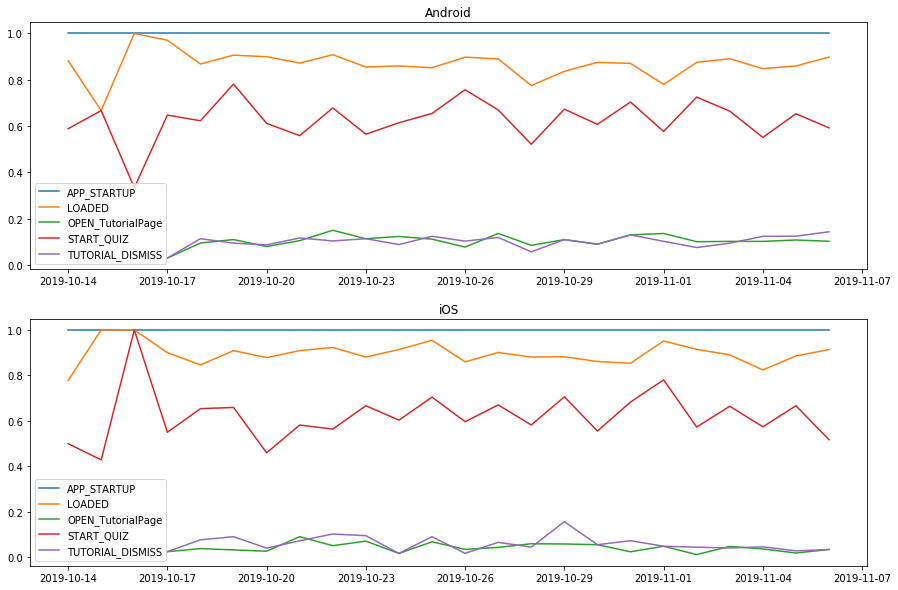

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(2, 1, figsize=(15, 10))
for i, (client, df_) in enumerate(df.groupby('client')):
    ax = axes[i]
    for action, df__ in df_.groupby('action'):
        ax.plot(df__['date'], df__['percent'], label=action)
    ax.legend()
    ax.set_title(client)